In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

In [3]:
train_b = np.loadtxt('BDT_background_train.txt')
train_s = np.loadtxt('BDT_signal_train.txt')

test_b = np.loadtxt('BDT_background_test.txt')
test_s = np.loadtxt('BDT_signal_test.txt')

In [4]:
# Training data 

# Background
train_xb = train_b[:,0]
train_yb = train_b[:,1]
train_zb = train_b[:,2]

# Signal
train_xs = train_s[:,0]
train_ys = train_s[:,1]
train_zs = train_s[:,2]

In [5]:
# Testing data 

# Background
test_xb = test_b[:,0]
test_yb = test_b[:,1]
test_zb = test_b[:,2]

# Signal
test_xs = test_s[:,0]
test_ys = test_s[:,1]
test_zs = test_s[:,2]

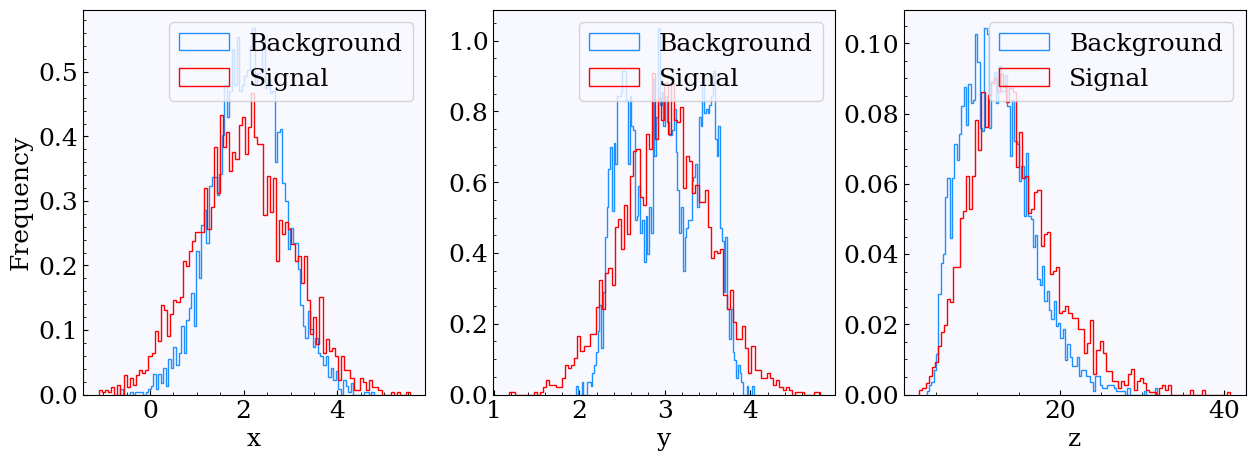

In [6]:
# Plot 1D histograms of the training data for each variable 

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].hist(train_xb, bins=100, histtype='step', label='Background', density=True)
ax[0].hist(train_xs, bins=100, histtype='step', label='Signal', density=True)

ax[1].hist(train_yb, bins=100, histtype='step', label='Background', density=True)
ax[1].hist(train_ys, bins=100, histtype='step', label='Signal', density=True)

ax[2].hist(train_zb, bins=100, histtype='step', label='Background', density=True)
ax[2].hist(train_zs, bins=100, histtype='step', label='Signal', density=True)

ax[0].set(xlabel='x', 
          ylabel='Frequency')

ax[1].set(xlabel='y')

ax[2].set(xlabel='z')

ax[0].legend()
ax[1].legend()
ax[2].legend();

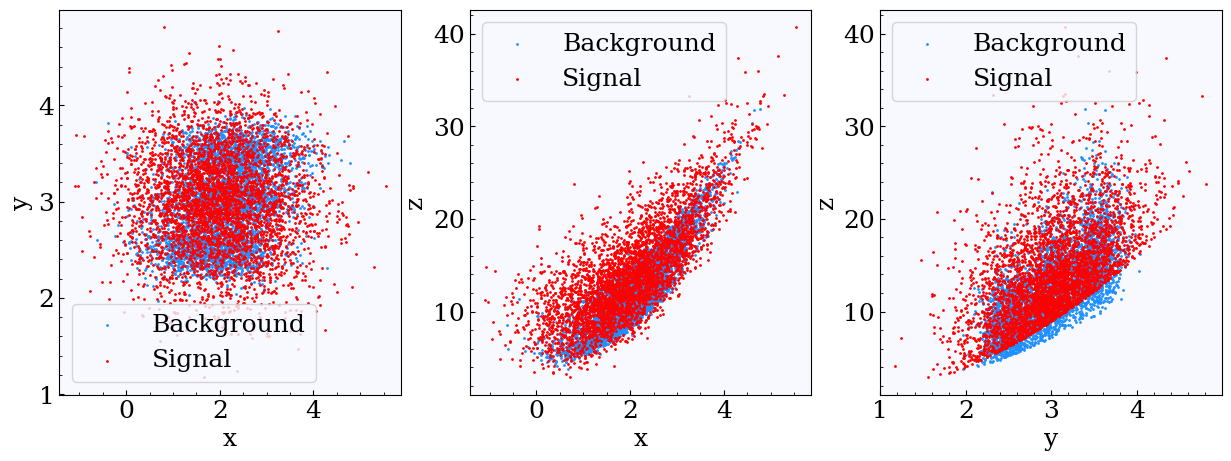

In [7]:
# plot scatter plots of the training data for each variable

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(train_xb, train_yb, label='Background', s=1)
ax[0].scatter(train_xs, train_ys, label='Signal', s=1)

ax[1].scatter(train_xb, train_zb, label='Background', s=1)
ax[1].scatter(train_xs, train_zs, label='Signal', s=1)

ax[2].scatter(train_yb, train_zb, label='Background', s=1)
ax[2].scatter(train_ys, train_zs, label='Signal', s=1)

ax[0].set(xlabel='x',
            ylabel='y')

ax[1].set(xlabel='x',
            ylabel='z')

ax[2].set(xlabel='y',
            ylabel='z')

ax[0].legend()
ax[1].legend()
ax[2].legend();

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Look into Light GBM for gradient boosting

# Create the AdaBoost classifier
bdt = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

# Training data
train_data = np.vstack((train_b, train_s)) 
train_target = np.hstack((np.zeros(len(train_b)), np.ones(len(train_s))))

# Testing data
test_data = np.vstack((test_b, test_s))
test_target = np.hstack((np.zeros(len(test_b)), np.ones(len(test_s))))

# Train the classifier  
model = bdt.fit(train_data, train_target)

# Test the classifier
y_pred = model.predict_proba(test_data)

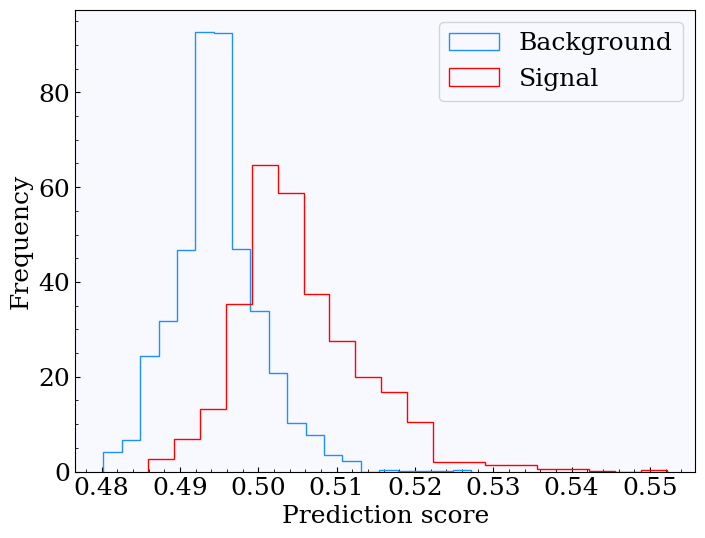

In [21]:
# Plot prediction score

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.hist(y_pred[:,1][test_target==0], bins=20, histtype='step', label='Background', density=True)
ax.hist(y_pred[:,1][test_target==1], bins=20, histtype='step', label='Signal', density=True)

ax.set(xlabel='Prediction score',
         ylabel='Frequency')

ax.legend();

## Exercise 2

In [27]:
data = np.loadtxt('BDT_16var.txt')

# Even rows are signal. Odd rows are background.
# Change first column to 0 for background and 1 for signal
data[::2,0] = 1
data[1::2,0] = 0

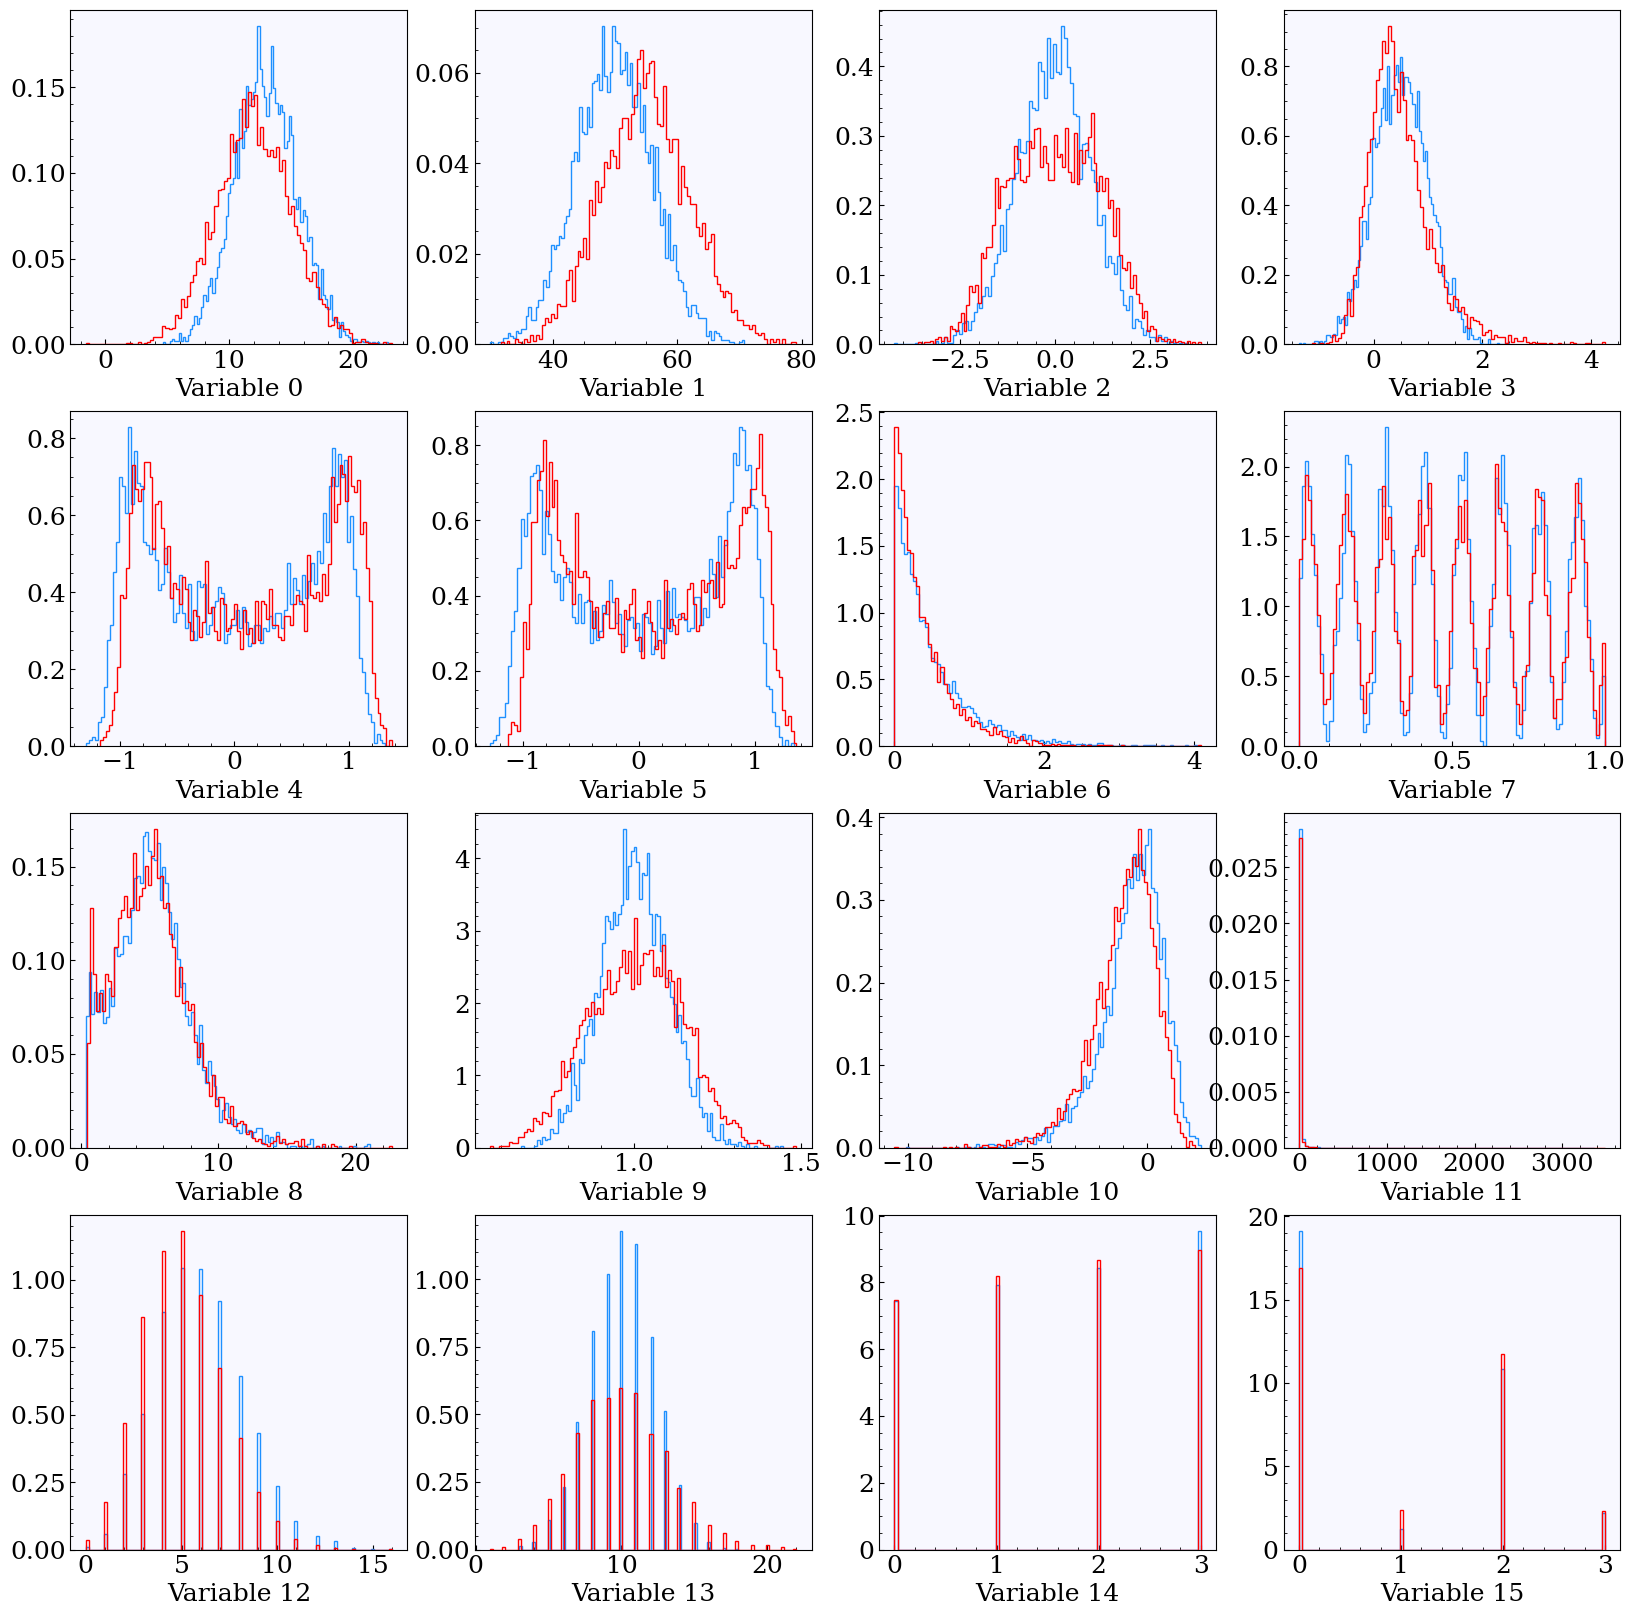

In [29]:
# Plot histograms of the 16 varibales 
# Last column is the target variable

fig, ax = plt.subplots(4,4, figsize=(20,20))

for i in range(4):
    for j in range(4):
        ax[i,j].hist(data[:,1 + i*4+j][data[:,0]==0], bins=100, histtype='step', label='Background', density=True)
        ax[i,j].hist(data[:,1 + i*4+j][data[:,0]==1], bins=100, histtype='step', label='Signal', density=True)
        ax[i,j].set(xlabel='Variable {}'.format(i*4+j))

In [33]:
from sklearn.model_selection import train_test_split

# Split data into training and testing data
train_data, test_data = train_test_split(data, test_size=0.5)

# Training data
train_target = train_data[:,0]
train_data = train_data[:,1:]

# Testing data
test_target = test_data[:,0]
test_data = test_data[:,1:]

# Create the AdaBoost classifier
bdt = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

# Train the classifier
model = bdt.fit(train_data, train_target)

# Test the classifier
y_pred = model.predict_proba(test_data)

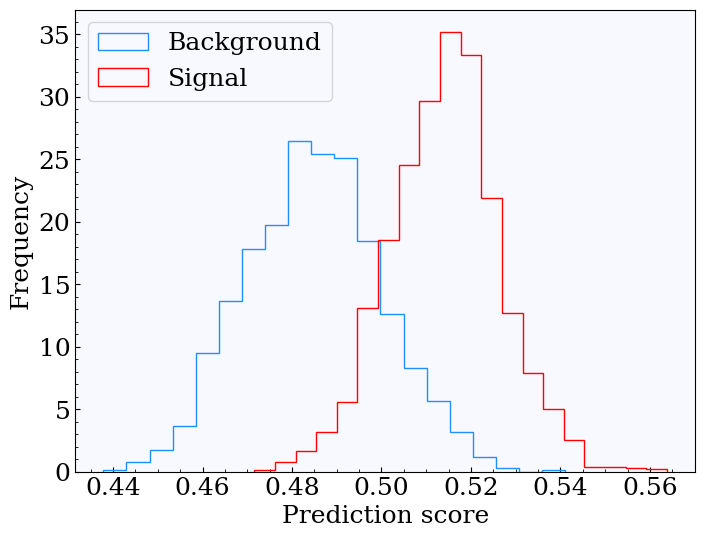

In [34]:
# Plot prediction score

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.hist(y_pred[:,1][test_target==0], bins=20, histtype='step', label='Background', density=True)
ax.hist(y_pred[:,1][test_target==1], bins=20, histtype='step', label='Signal', density=True)

ax.set(xlabel='Prediction score',
            ylabel='Frequency')

ax.legend();


In [35]:
# Rank the variables by importance
importances = model.feature_importances_

# Sort the variables by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(train_data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.435000)
2. feature 0 (0.400000)
3. feature 9 (0.035000)
4. feature 13 (0.030000)
5. feature 12 (0.025000)
6. feature 5 (0.020000)
7. feature 4 (0.020000)
8. feature 2 (0.015000)
9. feature 10 (0.010000)
10. feature 3 (0.010000)
11. feature 15 (0.000000)
12. feature 14 (0.000000)
13. feature 11 (0.000000)
14. feature 8 (0.000000)
15. feature 7 (0.000000)
16. feature 6 (0.000000)


In [36]:
# Remove the least important variables
train_data = train_data[:,indices[:10]]
test_data = test_data[:,indices[:10]]

# Create the AdaBoost classifier
bdt = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

# Train the classifier
model = bdt.fit(train_data, train_target)

# Test the classifier
y_pred = model.predict_proba(test_data)

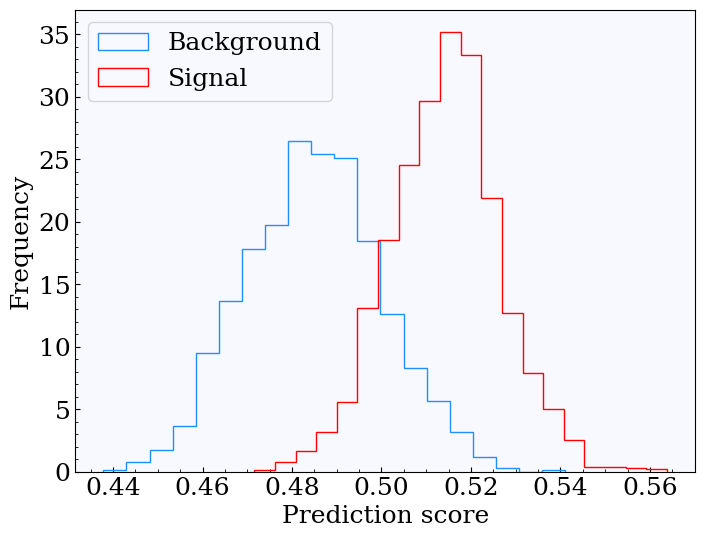

In [38]:
# Plot prediction score

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.hist(y_pred[:,1][test_target==0], bins=20, histtype='step', label='Background', density=True)
ax.hist(y_pred[:,1][test_target==1], bins=20, histtype='step', label='Signal', density=True)

ax.set(xlabel='Prediction score',
            ylabel='Frequency')

ax.legend();